In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight

# Define directories for training and testing datasets
train_dir = os.path.join('/kaggle/input/image-classification/triple_mnist/train')
test_dir = os.path.join('/kaggle/input/image-classification/triple_mnist/test')

2024-07-09 18:08:12.593273: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-09 18:08:12.593437: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-09 18:08:12.752544: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Create ImageDataGenerators for training and testing
datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)

# Define image size and batch size
image_size = (28, 28)
batch_size = 32

# Load and preprocess training data
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Load and preprocess validation data
validation_generator = datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 51200 images belonging to 640 classes.
Found 12800 images belonging to 640 classes.


In [3]:
# Calculate class weights
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(train_generator.classes),
                                     y=train_generator.classes)
class_weights = {i: class_weights[i] for i in range(len(class_weights))}

# Initialize the model
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(train_generator.num_classes, activation='softmax'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Add a learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
import os  #optional

# Check the contents of the training directory
print("Training directory structure:")
for root, dirs, files in os.walk(train_dir):
    if len(files) > 0:
        print(root, "contains", len(files), "files")

# Check the contents of the testing directory
print("\nTesting directory structure:")
for root, dirs, files in os.walk(test_dir):
    if len(files) > 0:
        print(root, "contains", len(files), "files")


Training directory structure:
/kaggle/input/image-classification/triple_mnist/train/437 contains 100 files
/kaggle/input/image-classification/triple_mnist/train/248 contains 100 files
/kaggle/input/image-classification/triple_mnist/train/625 contains 100 files
/kaggle/input/image-classification/triple_mnist/train/479 contains 100 files
/kaggle/input/image-classification/triple_mnist/train/183 contains 100 files
/kaggle/input/image-classification/triple_mnist/train/973 contains 100 files
/kaggle/input/image-classification/triple_mnist/train/642 contains 100 files
/kaggle/input/image-classification/triple_mnist/train/057 contains 100 files
/kaggle/input/image-classification/triple_mnist/train/313 contains 100 files
/kaggle/input/image-classification/triple_mnist/train/795 contains 100 files
/kaggle/input/image-classification/triple_mnist/train/600 contains 100 files
/kaggle/input/image-classification/triple_mnist/train/199 contains 100 files
/kaggle/input/image-classification/triple_mnis

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1600/1600 ━━━━━━━━━━━━━━━━━━━━ 455s 283ms/step - accuracy: 0.0016 - loss: 6.4568 - val_accuracy: 0.0162 - val_loss: 5.5989
Epoch 2/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 92s 57ms/step - accuracy: 0.0250 - loss: 5.3445 - val_accuracy: 0.1658 - val_loss: 3.6027
Epoch 3/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 81s 51ms/step - accuracy: 0.1105 - loss: 3.8988 - val_accuracy: 0.2936 - val_loss: 2.7398
Epoch 4/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 82s 51ms/step - accuracy: 0.1959 - loss: 3.1913 - val_accuracy: 0.4073 - val_loss: 2.2284
Epoch 5/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 84s 52ms/step - accuracy: 0.2673 - loss: 2.7443 - val_accuracy: 0.4799 - val_loss: 1.9258
Epoch 6/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 84s 53ms/step - accuracy: 0.3314 - loss: 2.4401 - val_accuracy: 0.5305 - val_loss: 1.7305
Epoch 7/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 82s 51ms/step - accuracy: 0.3770 - loss: 2.2491 - val_accuracy: 0.5606 - val_loss: 1.6238
Epoch 8/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 82s 51ms/step - accuracy: 0.4239 - loss: 2.

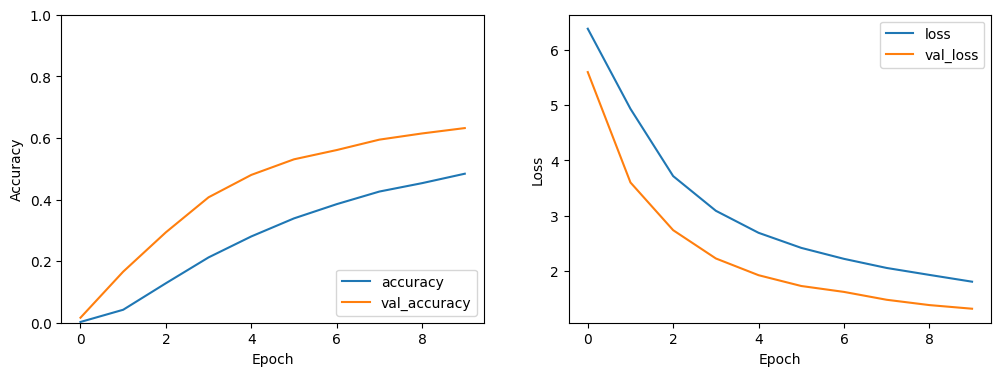

400/400 - 15s - 37ms/step - accuracy: 0.6320 - loss: 1.3196
Test accuracy: 0.6319531202316284


In [5]:

# Train the model
history = cnn_model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

# Plot learning curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

# Evaluate the model
test_loss, test_acc = cnn_model.evaluate(validation_generator, verbose=2)
print(f"Test accuracy: {test_acc}")


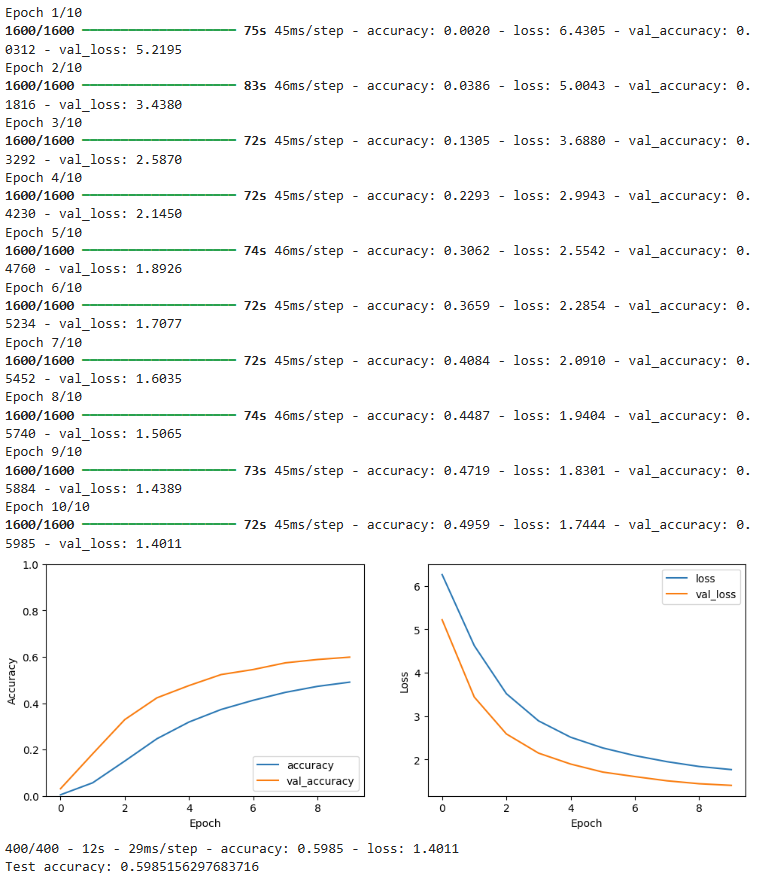

Found 51200 images belonging to 640 classes.
Found 12800 images belonging to 640 classes.
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1600/1600 ━━━━━━━━━━━━━━━━━━━━ 85s 52ms/step - accuracy: 0.0033 - loss: 6.3747 - val_accuracy: 0.0696 - val_loss: 4.5591 - learning_rate: 0.0010
Epoch 2/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 85s 53ms/step - accuracy: 0.0649 - loss: 4.5109 - val_accuracy: 0.2546 - val_loss: 2.9569 - learning_rate: 0.0010
Epoch 3/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 82s 51ms/step - accuracy: 0.1743 - loss: 3.3319 - val_accuracy: 0.3740 - val_loss: 2.3533 - learning_rate: 0.0010
Epoch 4/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 89s 55ms/step - accuracy: 0.2656 - loss: 2.7724 - val_accuracy: 0.4822 - val_loss: 1.9215 - learning_rate: 0.0010
Epoch 5/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 82s 51ms/step - accuracy: 0.3535 - loss: 2.3632 - val_accuracy: 0.5529 - val_loss: 1.6525 - learning_rate: 0.0010
Epoch 6/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 83s 52ms/step - accuracy: 0.4139 - loss: 2.1051 - val_accuracy: 0.5851 - val_loss: 1.5269 - learning_rate: 0.0010
Epoch 7/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 82s 51ms/step - accuracy: 0.4563 

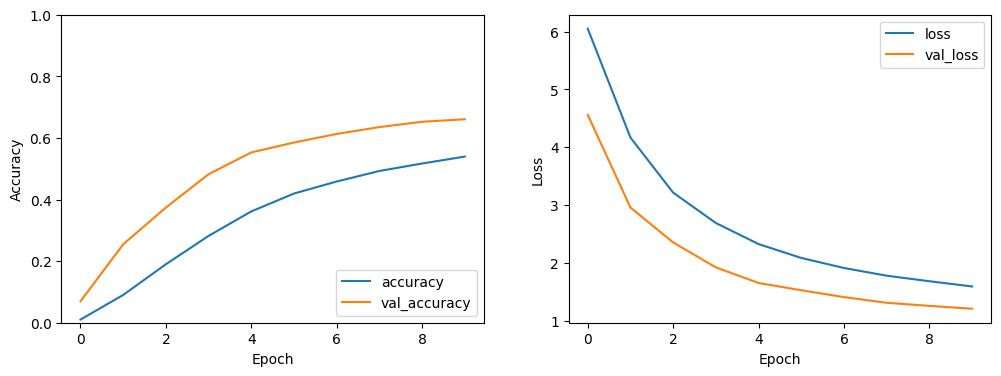

400/400 - 13s - 33ms/step - accuracy: 0.6606 - loss: 1.2076
Test accuracy: 0.6606249809265137


In [6]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight

# Define directories for training and testing datasets
train_dir = '/kaggle/input/image-classification/triple_mnist/train'
test_dir = '/kaggle/input/image-classification/triple_mnist/test'

# Create ImageDataGenerators for training and validation
datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)

# Define image size and batch size
image_size = (28, 28)
batch_size = 32

# Load and preprocess training data
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Load and preprocess validation data
validation_generator = datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Calculate class weights
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(train_generator.classes),
                                     y=train_generator.classes)
class_weights = {i: class_weights[i] for i in range(len(class_weights))}

# Initialize the model
cnn_model = Sequential([
    Input(shape=(28, 28, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Add a learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)

# Train the model
history = cnn_model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    class_weight=class_weights,
    callbacks=[lr_scheduler]
)

# Plot learning curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

# Evaluate the model
test_loss, test_acc = cnn_model.evaluate(validation_generator, verbose=2)
print(f"Test accuracy: {test_acc}")


Explanation
Import Libraries: Import necessary libraries and modules.
Define Directories: Set the directory paths for training and testing datasets.
Create ImageDataGenerators: Set up ImageDataGenerator for both training and validation with validation_split.
Load Data: Use flow_from_directory to load and preprocess the images.
Calculate Class Weights: Compute class weights using compute_class_weight from sklearn.utils.class_weight.
Build CNN Model: Define the architecture of the CNN model using Input layer.
Compile Model: Compile the model with the Adam optimizer and categorical crossentropy loss function.
Add Learning Rate Scheduler: Use ReduceLROnPlateau to adjust the learning rate when the validation loss plateaus.
Train Model: Train the model using the training data and validate it on the validation data, applying the class weights.
Plot Learning Curves: Plot the training and validation accuracy and loss over epochs to visualize the model's learning progress.
Evaluate Model: Evaluate the model on the validation data and print the test accuracy.
By following these steps, you can ensure that the model is trained correctly on Kaggle with the provided dataset structure, assuming the directories are already set up properly.